# Introductory applied machine learning (INFR10069) 

# Lab 4: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located at the `./datasets` directory which is adjacent to this file.

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
%matplotlib inline

## 1. Spam filtering

### ========== Question 1.1 ==========
Download the `spambase_binary.csv` dataset and load it into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [2]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')
spambase = pd.read_csv(data_path, delimiter = ',')
print('Number of instances: {}, number of attributes: {}'.format(spambase.shape[0], spambase.shape[1]))
spambase.head(5)

Number of instances: 4601, number of attributes: 55


,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
Use [Hold-out validation](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.train_test_split.html) to split the dataset into training and testing subsets. Use 90% of the data for training and the remaining 10% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`. Make sure you don't include the target variable `is_spam` in the input features.

In [3]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(spambase.drop("is_spam", axis=1), spambase["is_spam"], \
                                                    train_size = 0.9, test_size=0.1, random_state=0)

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [4]:
# Your code goes here
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(X_train, y_train)))
print('Classification accuracy on test set: {:.3f}'.format(lr.score(X_test, y_test)))

Classification accuracy on training set: 0.935
Classification accuracy on test set: 0.928


*Your answer goes here*

Indeed, the classifier generalises well since the classification accuracy on the test set is comparable to the training classification.

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`. Generally, we would expect the string $ to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [5]:
# Your code goes here
hp_ind = spambase.columns.get_loc('word_freq_hp_binarized')
dollar_ind = spambase.columns.get_loc('char_freq_$_binarized')
print('Coefficient for word_freq_hp_binarized: {:.3f}'.format(lr.coef_[0, hp_ind]))
print('Coefficient for char_freq_$_binarized: {:.3f}'.format(lr.coef_[0, dollar_ind]))

Coefficient for word_freq_hp_binarized: -2.639
Coefficient for char_freq_$_binarized: 1.699


*Your answer goes here*

Indeed, the coefficients make sense, since the attribute `word_freq_hp_binarized` has a negative coefficient, meaning that it provides support for `non-spam` classification. On the other hand, `char_freq_`$`_binarized` has a positive coefficient, thus providing support for class 1 (i.e. `spam`).

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [6]:
# Your code goes here
svc_linear = LinearSVC()
svc_linear.fit(X_train, y_train)
print('Linear SVC classification accuracy on training set: {:.3f}'.format(svc_linear.score(X_train, y_train)))
print('Linear SVC classification accuracy on test set: {:.3f}'.format(svc_linear.score(X_test, y_test)))

Linear SVC classification accuracy on training set: 0.935
Linear SVC classification accuracy on test set: 0.920


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [7]:
# Your code goes here
print('Coefficient for word_freq_hp_binarized: {:.3f}'.format(svc_linear.coef_[0, hp_ind]))
print('Coefficient for char_freq_$_binarized: {:.3f}'.format(svc_linear.coef_[0, dollar_ind]))

Coefficient for word_freq_hp_binarized: -0.857
Coefficient for char_freq_$_binarized: 0.569


*Your answer goes here*

They are consistent. 

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

*Your answer goes here*

They both have linear classification boundaries with respect to the inputs. The classification mechanism is, however, fundamentally different. Logistic regression applies a linear transformation to the input and the result is transformed to a probability by using a non-linear function. Support vector machine classification is based on the similiarty of a new data point to a few training instances known as support vectors.

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [8]:
# Your code goes here
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
svc_poly = SVC(kernel='poly', degree=2)
svc_poly.fit(X_train, y_train)
print('RBF SVC classification accuracy on training set: {:.3f}'.format(svc_rbf.score(X_train, y_train)))
print('RBF SVC classification accuracy on test set: {:.3f}'.format(svc_rbf.score(X_test, y_test)))
print('Poly SVC classification accuracy on training set: {:.3f}'.format(svc_poly.score(X_train, y_train)))
print('Poly SVC classification accuracy on test set: {:.3f}'.format(svc_poly.score(X_test, y_test)))

RBF SVC classification accuracy on training set: 0.934
RBF SVC classification accuracy on test set: 0.931
Poly SVC classification accuracy on training set: 0.873
Poly SVC classification accuracy on test set: 0.874


*Your answer goes here*

It appears that there is a very slight benefit to using a radial basis kernel. However, before we can make any solid claims, we need to perform a cross-validation and try different parameters for these kernels c.f. [the sklearn doc examples](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py)

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. Read the description at the link above for a brief overview of how this works. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [9]:
# Your code goes here
data_path_train = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')
splice_train = pd.read_csv(data_path_train, delimiter = ',')
print('Number of instances: {}, number of attributes: {}'.format(splice_train.shape[0], splice_train.shape[1]))
splice_train.head(5)

Number of instances: 2935, number of attributes: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N


In [10]:
data_path_test = os.path.join(os.getcwd(), 'datasets', 'splice_test.csv')
splice_test = pd.read_csv(data_path_test, delimiter = ',')
print('Number of instances: {}, number of attributes: {}'.format(splice_test.shape[0], splice_test.shape[1]))
splice_test.head(5)

Number of instances: 255, number of attributes: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) tool. Make sure to not transform the target variable (`class`).

In [11]:
# Your code goes here
for column_train, column_test in zip(splice_train.drop("class", axis=1).columns, splice_test.drop("class", axis=1).columns):
    le = LabelEncoder().fit(splice_train[column_train])
    splice_train[column_train] = le.transform(splice_train[column_train])
    splice_test[column_test] = le.transform(splice_test[column_test])

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [12]:
# Your code goes here
X_train = splice_train.drop("class", axis=1).as_matrix()
X_test = splice_test.drop("class", axis=1).as_matrix()
y_train = splice_train["class"]
y_test = splice_test["class"]
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_train shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (2935, 60)
y_train shape: (2935,)
X_train shape: (255, 60)
y_test shape: (255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbors Classification](http://scikit-learn.org/stable/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbor. Report the classification accuracy on the training set.

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('KNN classification (k=1) accuracy on training set: {:.3f}'.format( knn.score(X_train, y_train)))

KNN classification (k=1) accuracy on training set: 1.000


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

*Your answer goes here*

The above result is not meaningful. The 1-nearest neighbor classifier will classify each instace to the class of the nearest insance in the training set. If we test the classifier on the training set, then each input will be classified correctly since the closest instance in the training set is the instance itself. The performance on unseen data is expected to be much lower.

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [14]:
# Your code goes here
print('KNN classification (k=1) accuracy on test set: {:.3f}'.format(knn.score(X_test, y_test)))

KNN classification (k=1) accuracy on test set: 0.612


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas bulit-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html). 

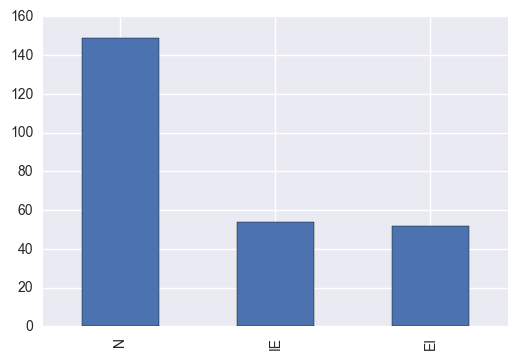

In [15]:
# Your code goes here
class_counts = splice_test["class"].value_counts()
ax = class_counts.plot(kind="bar")

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`?

In [16]:
# Your code goes here
print('The baseline classifier (predict always N) would achieve a classification accuracy score of: {:.3f}'.
      format(class_counts["N"] / class_counts.values.sum()))

The baseline classifier (predict always N) would achieve a classification accuracy score of: 0.584


### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the base rate again.*

In [17]:
k_list = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
ca = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    ca.append(score)
    print('Performance on test with {} nearest neighbours: {:.3f}'.format(k, score))

Performance on test with 5 nearest neighbours: 0.643
Performance on test with 10 nearest neighbours: 0.655
Performance on test with 50 nearest neighbours: 0.682
Performance on test with 100 nearest neighbours: 0.663
Performance on test with 200 nearest neighbours: 0.667
Performance on test with 500 nearest neighbours: 0.690
Performance on test with 1000 nearest neighbours: 0.694
Performance on test with 1500 nearest neighbours: 0.584
Performance on test with 2000 nearest neighbours: 0.584


### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

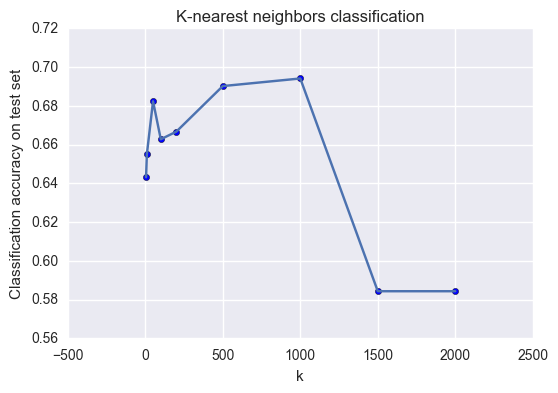

In [18]:
# Your code goes here
plt.scatter(k_list, ca)
plt.plot(k_list,ca, )
plt.xlabel('k')
plt.ylabel('Classification accuracy on test set')
plt.title('K-nearest neighbors classification')
plt.show()

*Your answer goes here*

Increasing K improves performance up to a certain point. Beyond that point, the classifier uses virtually all training samples to classify a new instance and as a results classifies all instances to the dominant class (identically to our baseline model).

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set. Then plot the confusion matrix for a 5-nearest neighbor classifier. What do you observe?

In [19]:
# Your code goes here
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

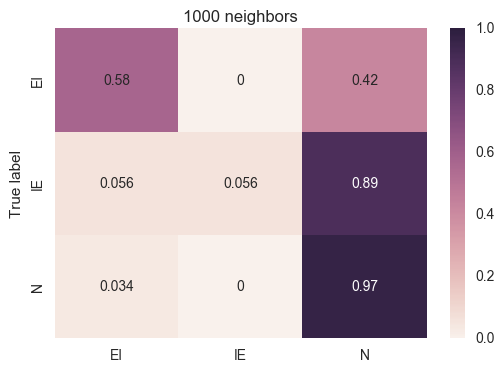

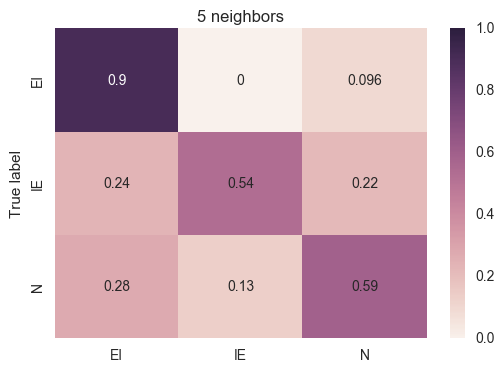

In [20]:
for i in [1000, 5]:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=knn.classes_, title = str(i) + ' neighbors')

*Your answer goes here*

With 1000 neighbors, the `N` class is almost always predicted correctly, but the other two classes are not.

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss) metric which is often used in neural networks. 

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence (i.e. probability) that these are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts tha the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss`  metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was your metric of interest?

Performance on test with  5  nearest neighbours:  3.0907788313
Performance on test with  10  nearest neighbours:  1.08261026427
Performance on test with  50  nearest neighbours:  0.758679827912
Performance on test with  100  nearest neighbours:  0.789133366505
Performance on test with  200  nearest neighbours:  0.82035137879
Performance on test with  500  nearest neighbours:  0.858272132213
Performance on test with  1000  nearest neighbours:  0.897384110539
Performance on test with  1500  nearest neighbours:  0.920823603557
Performance on test with  2000  nearest neighbours:  0.940353697398


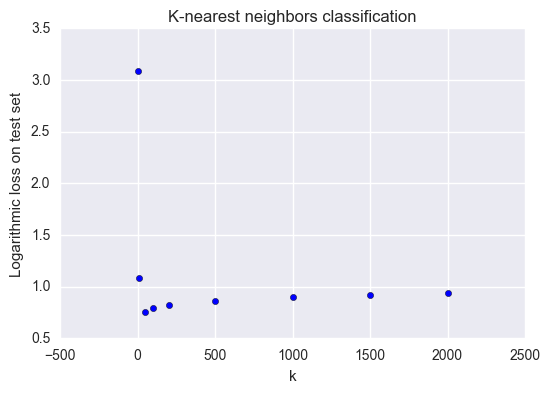

In [21]:
# Your code goes here
k_list = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
logloss = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    pred_proba = knn.predict_proba(X_test)
    this_logloss = log_loss(y_test, pred_proba)
    logloss.append(this_logloss)
    print('Performance on test with ', k, ' nearest neighbours: ', this_logloss)
plt.scatter(k_list, logloss)
plt.xlabel('k')
plt.ylabel('Logarithmic loss on test set')
plt.title('K-nearest neighbors classification')
plt.show()

*Your answer goes here*

We would pick the 50-neighbours classifier.

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

*Your answer goes here*

No, that wouldn't be possible because SVMs are not probabilistic classifiers (i.e. they only yield a classification decision and not a posterior probability distribution). Nevertheless `sklearn` does provide a `predict_proba()` method which returns probability estimates on predictions by using cross-validation.